<a href="https://colab.research.google.com/github/Himmesh/Customer-Conversion-Prediction/blob/main/Customer_conversion_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the packages and read the data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

df  = pd.read_csv("Customer_Conversion_Prediction_main.csv")
print(df.columns)
df['y'].value_counts(normalize = True)

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')


no     0.883015
yes    0.116985
Name: y, dtype: float64

## Convert the o/p variable to binary format

In [36]:
df['target'] = df['y'].map({'yes':1, 'no':0})
dff = df.drop(['y'],axis = 1)
dff.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


## Checking for corrections need to be done such as spelling mistakes, extra spaces etc in every column

In [37]:
for col in dff.columns:
  print(col, end = " ")
  print("-->", end = " ")
  print( dff[col].unique())
  print("===============================================")

age --> [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job --> ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital --> ['married' 'single' 'divorced']
education_qual --> ['tertiary' 'secondary' 'unknown' 'primary']
call_type --> ['unknown' 'cellular' 'telephone']
day --> [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
mon --> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
dur --> [ 261  151   76 ... 1298 1246 1556]
num_calls --> [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
prev_outcome --> ['unknown' 'failure' 'other' 'suc

## Checking for null values

In [38]:
dff.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
target            0
dtype: int64

## Checking for Duplicate rows

In [39]:
dff.duplicated().sum()

6

In [40]:
dff = dff.drop_duplicates()
dff.duplicated().sum()

0

In [41]:
dff.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
target            0
dtype: int64

## Identifying the Data-types in each columns

In [42]:
print(dff.dtypes)
num_col = ['age','day','dur', 'num_calls']
cat_col = list(set(dff.columns) - set(num_col))
cat_col.remove('target')
print(num_col, cat_col)

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
target             int64
dtype: object
['age', 'day', 'dur', 'num_calls'] ['prev_outcome', 'mon', 'marital', 'education_qual', 'job', 'call_type']


## Clipping outliers in continuous data

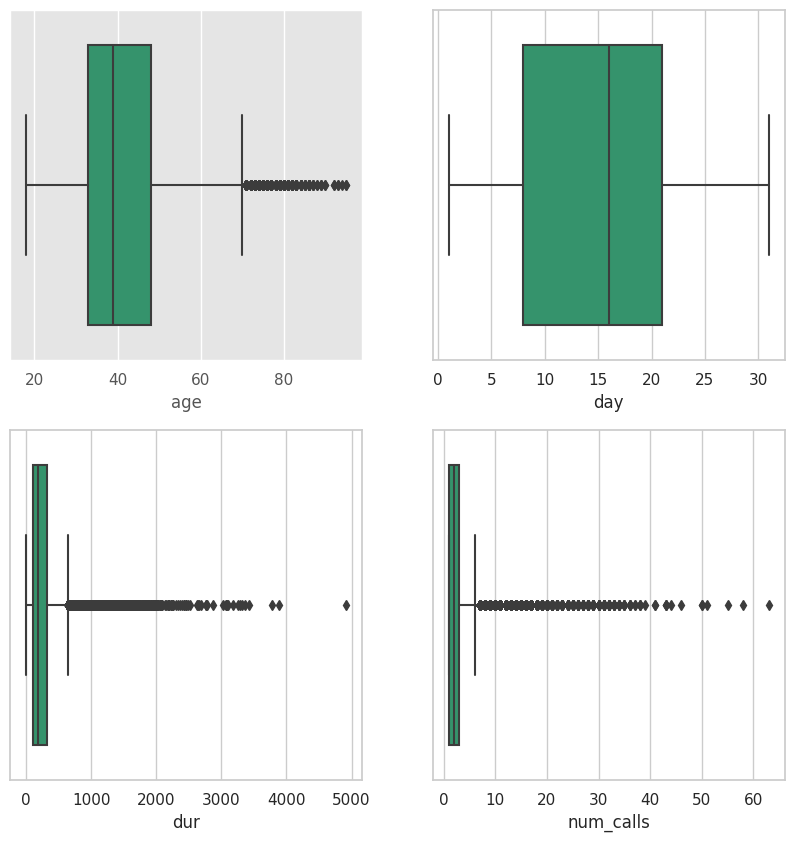

In [43]:
plt.figure(figsize=(10,10))
i = 1
for col in num_col:
  plt.subplot(2,2,i)
  sns.set(style="whitegrid")
  sns.boxplot(x = dff[col], color='#25a36f')
  i = i+1

In [44]:
for col in num_col:
  q1,q3=np.percentile(dff[col],[25,75])
  IQR=q3-q1
  upper=q3+1.5*IQR
  lower=q1-1.5*IQR
  print(col, " ---> Upper bound:",upper,"Lower bound :", lower)

age  ---> Upper bound: 70.5 Lower bound : 10.5
day  ---> Upper bound: 40.5 Lower bound : -11.5
dur  ---> Upper bound: 643.0 Lower bound : -221.0
num_calls  ---> Upper bound: 6.0 Lower bound : -2.0


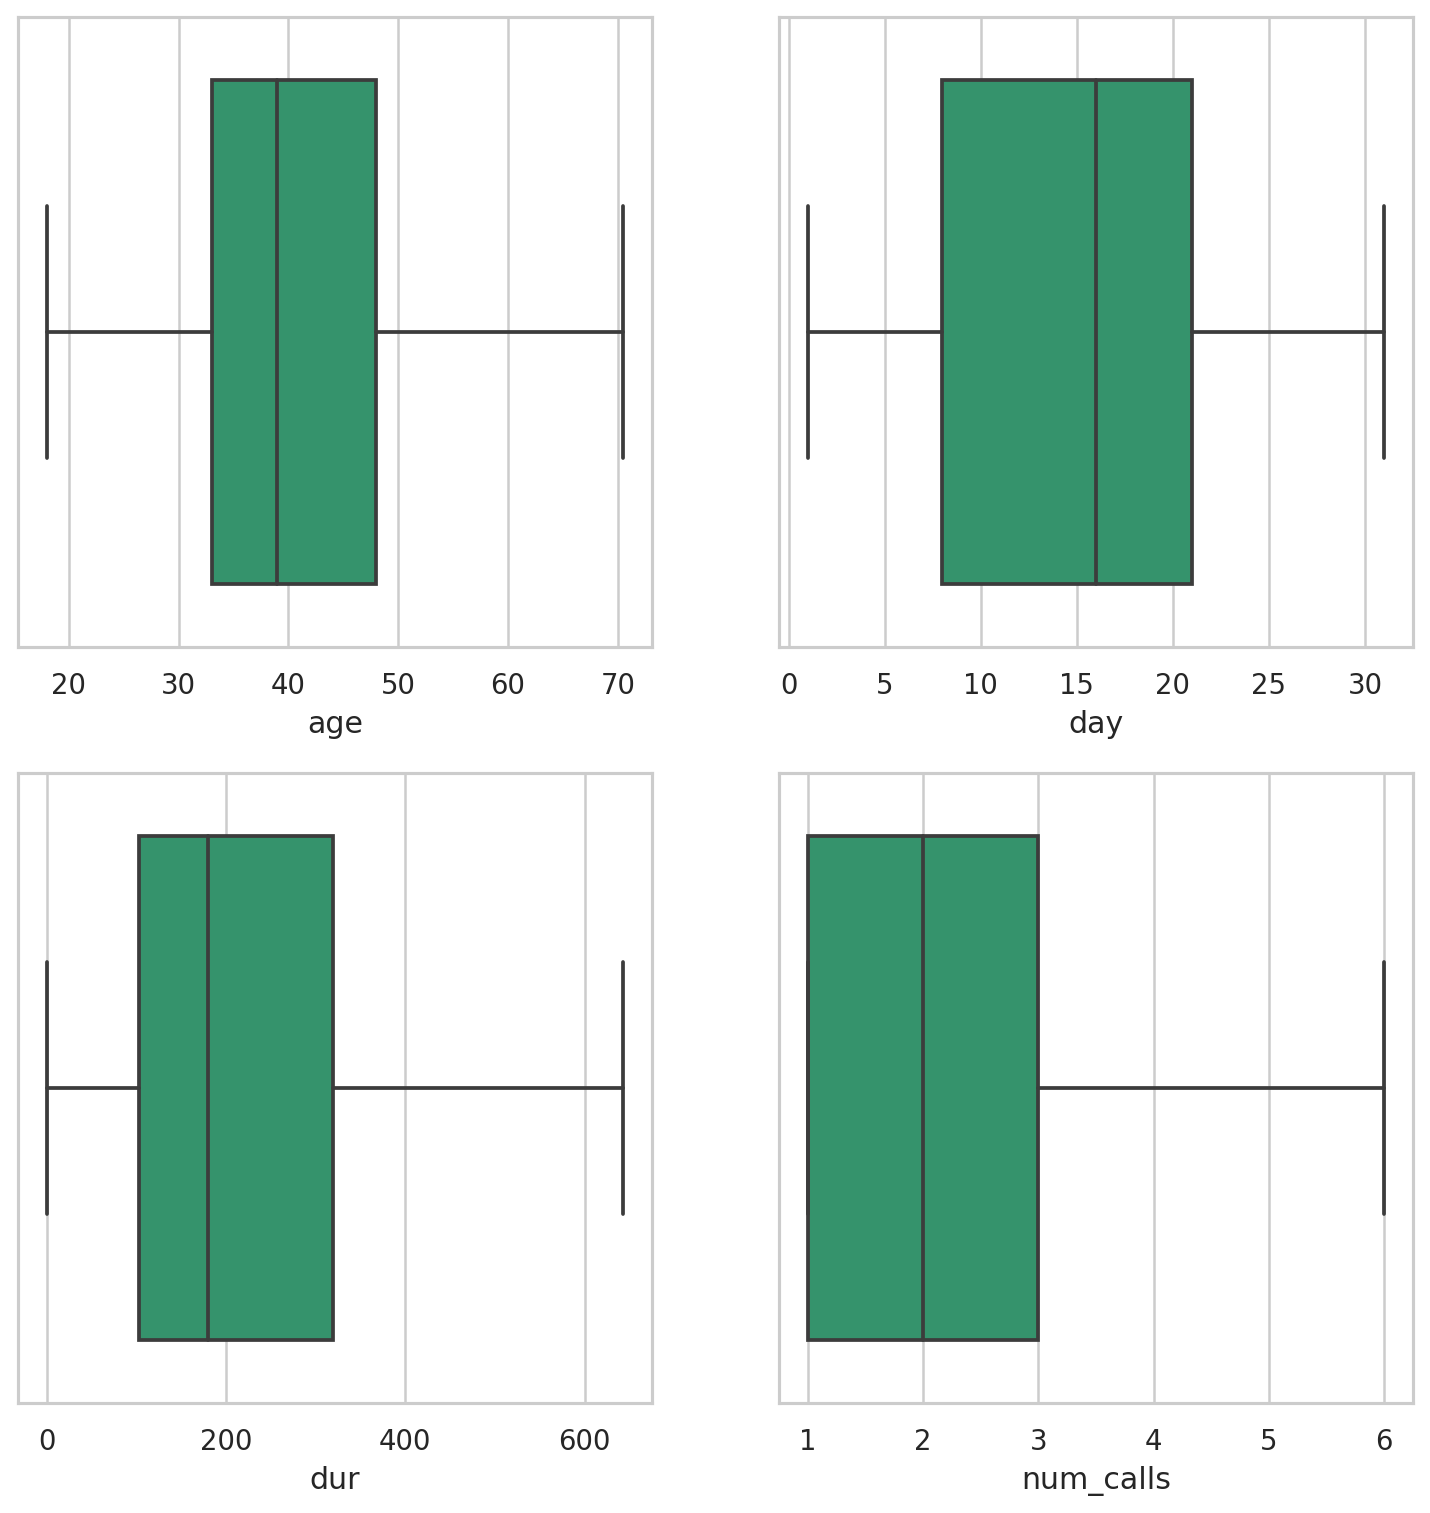

In [45]:
dff.age = df.age.clip(10.5,70.5)
dff.dur = df.dur.clip(-221.0,643.0)
dff.num_calls = df.num_calls.clip(-2,6.0)
plt.figure(figsize=(10,10), dpi = 180)
i = 1
for col in num_col:
  plt.subplot(2,2,i)
  sns.set(style="whitegrid")
  sns.boxplot(x = dff[col], color='#25a36f')
  i = i+1

## Imputing / Converting unknown or null data in categorical data

In [46]:
for col in cat_col:
  print(col)
  print("***Value counts***")
  print(dff[col].value_counts())
  print("===================")

prev_outcome
***Value counts***
unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64
mon
***Value counts***
may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64
marital
***Value counts***
married     27210
single      12788
divorced     5207
Name: marital, dtype: int64
education_qual
***Value counts***
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64
job
***Value counts***
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
call_type
***Value counts***
cellular     29282
unknown      13017
telephone     2906
Name: call_ty

In [47]:
print((dff['job'].value_counts()['unknown']/dff.shape[0])*100)
print((dff['education_qual'].value_counts()['unknown']/dff.shape[0])*100)
print((dff['prev_outcome'].value_counts()['unknown']/dff.shape[0])*100)
print((dff['call_type'].value_counts()['unknown']/dff.shape[0])*100)

0.6370976661873686
4.107952660103971
81.74538214799247
28.79548722486451


In [48]:
dff[['education_qual','job']] =dff[['education_qual','job']].replace('unknown',np.nan)
print(dff.isnull().sum())
print("=========================")
dff = dff. dropna(subset=['job'])
dff = dff.fillna({"education_qual" : st.mode(dff["education_qual"])})
print(dff.isnull().sum())

age                  0
job                288
marital              0
education_qual    1857
call_type            0
day                  0
mon                  0
dur                  0
num_calls            0
prev_outcome         0
target               0
dtype: int64
age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
target            0
dtype: int64


## Distribution of feature plot for continuous data

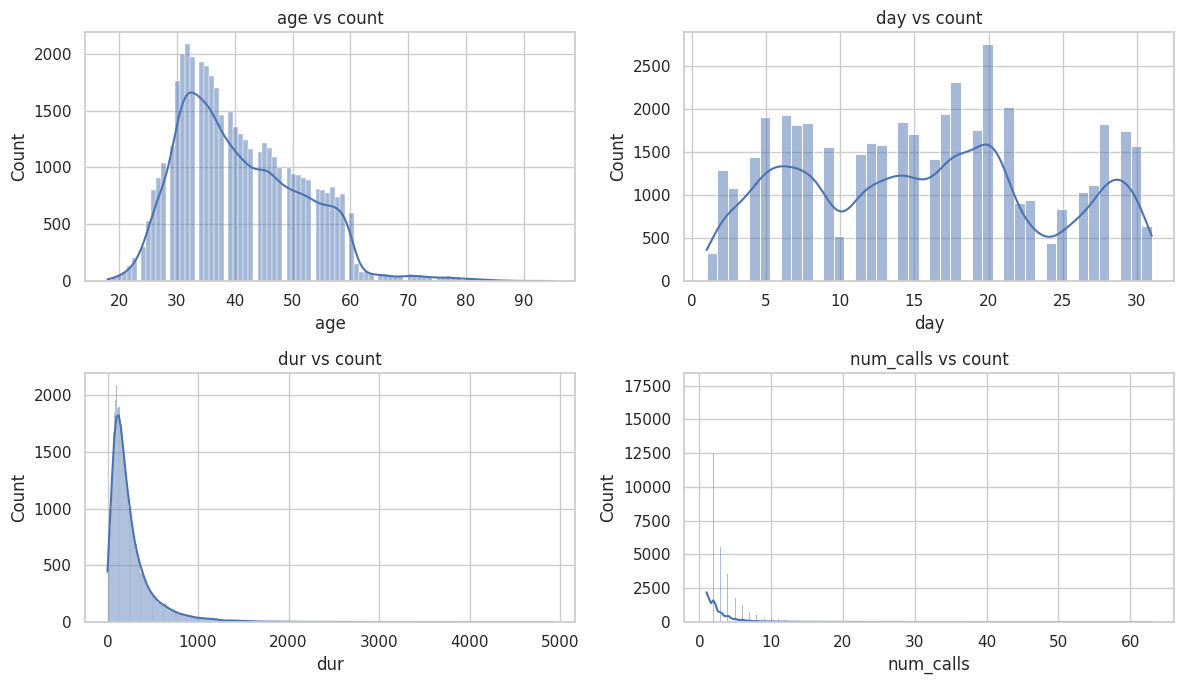

In [49]:
plt.figure(figsize=(12,7))

i = 1
for col in num_col:
  plt.subplot(2,2,i)
  sns.histplot(data=df,x=col,kde=True)
  plt.title(col + " vs count")
  i = i+1

plt.tight_layout()

## Distribution of feature plot for categorical data

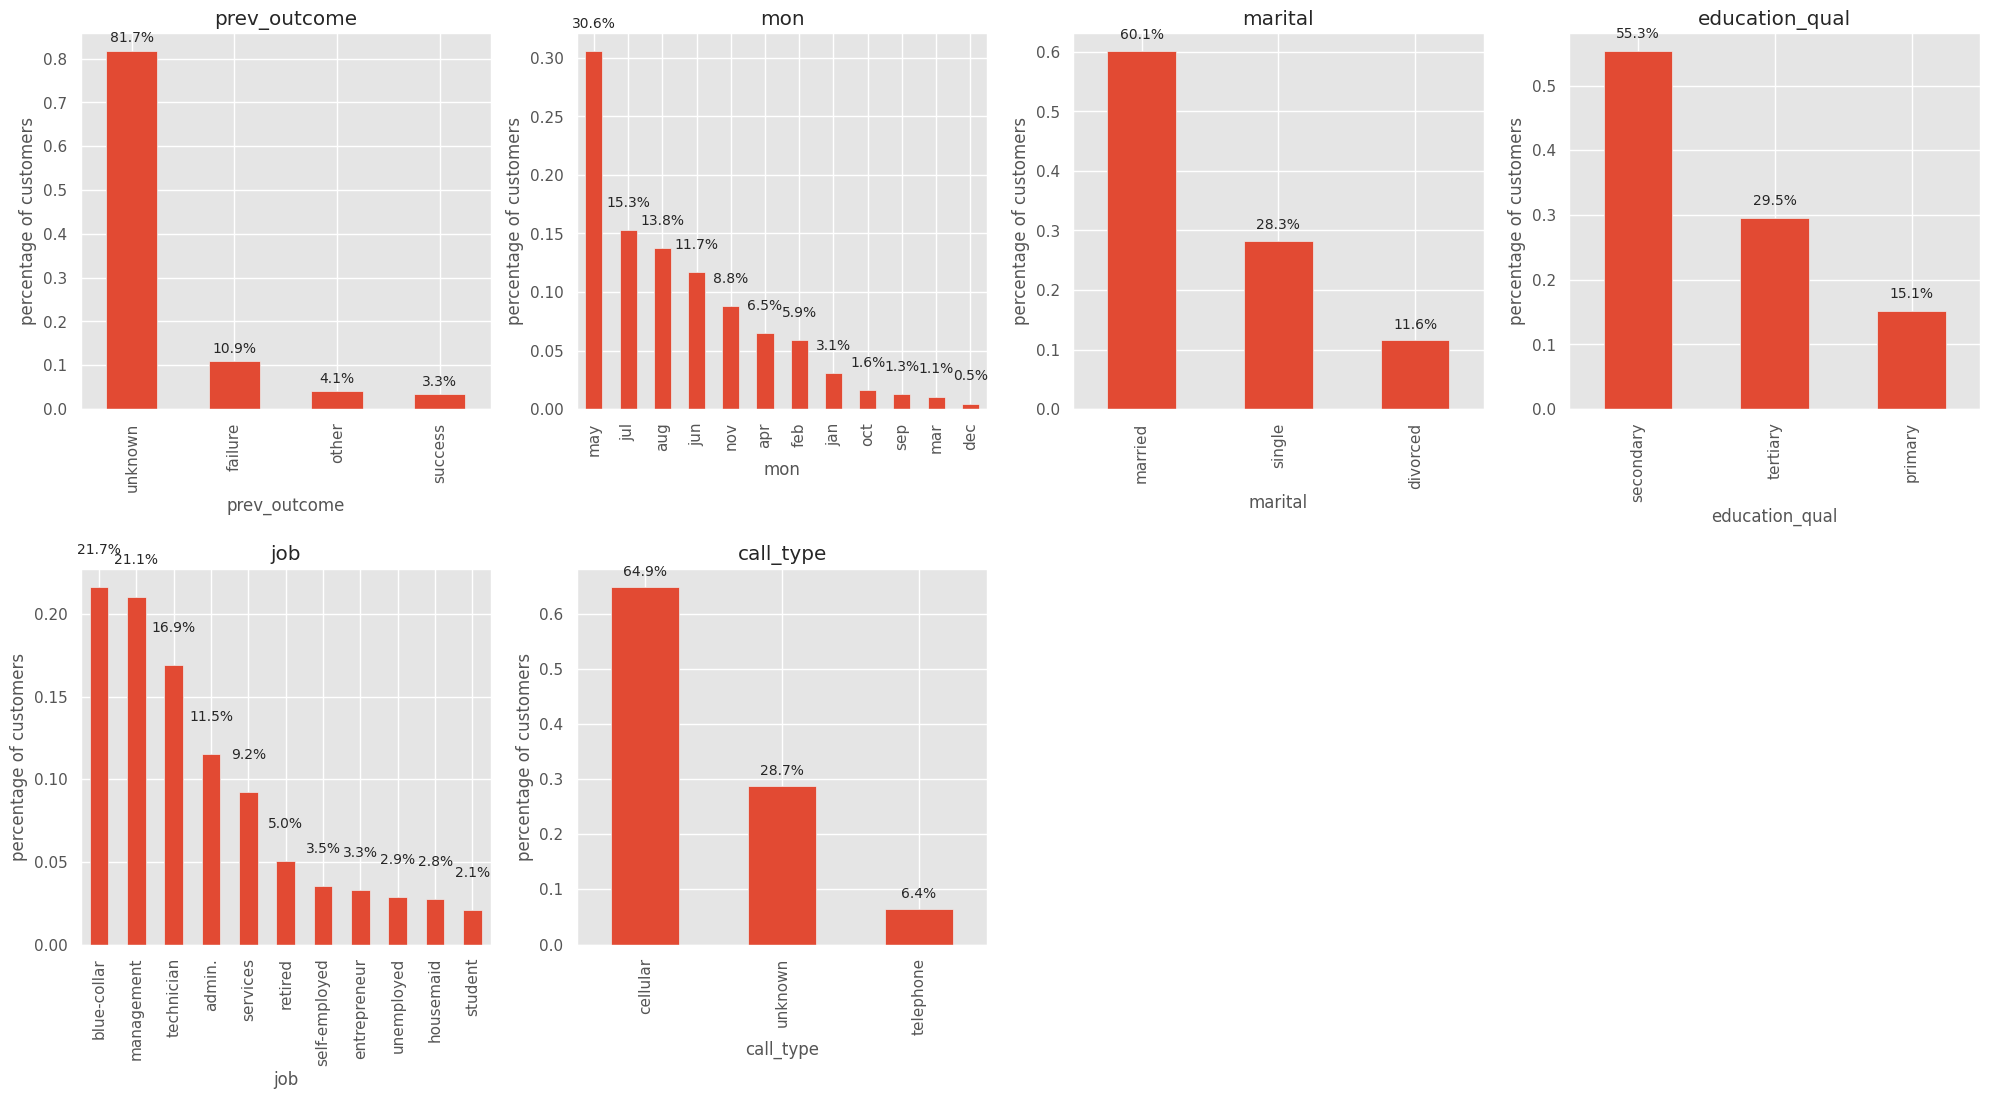

In [50]:
plt.style.use("ggplot")
plt.figure(figsize=(20,15))

i = 1
for column in cat_col:
    ax = plt.subplot(3,4,i)
    dff[column].value_counts(normalize=True).plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("percentage of customers")
    plt.title(column)

    # Add percentage labels to the top of each bar
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2., p.get_height()+0.02, f"{p.get_height()*100:.1f}%", ha="center")
    i = i+1


plt.tight_layout()

## Feature vs Target. - Categorical Features

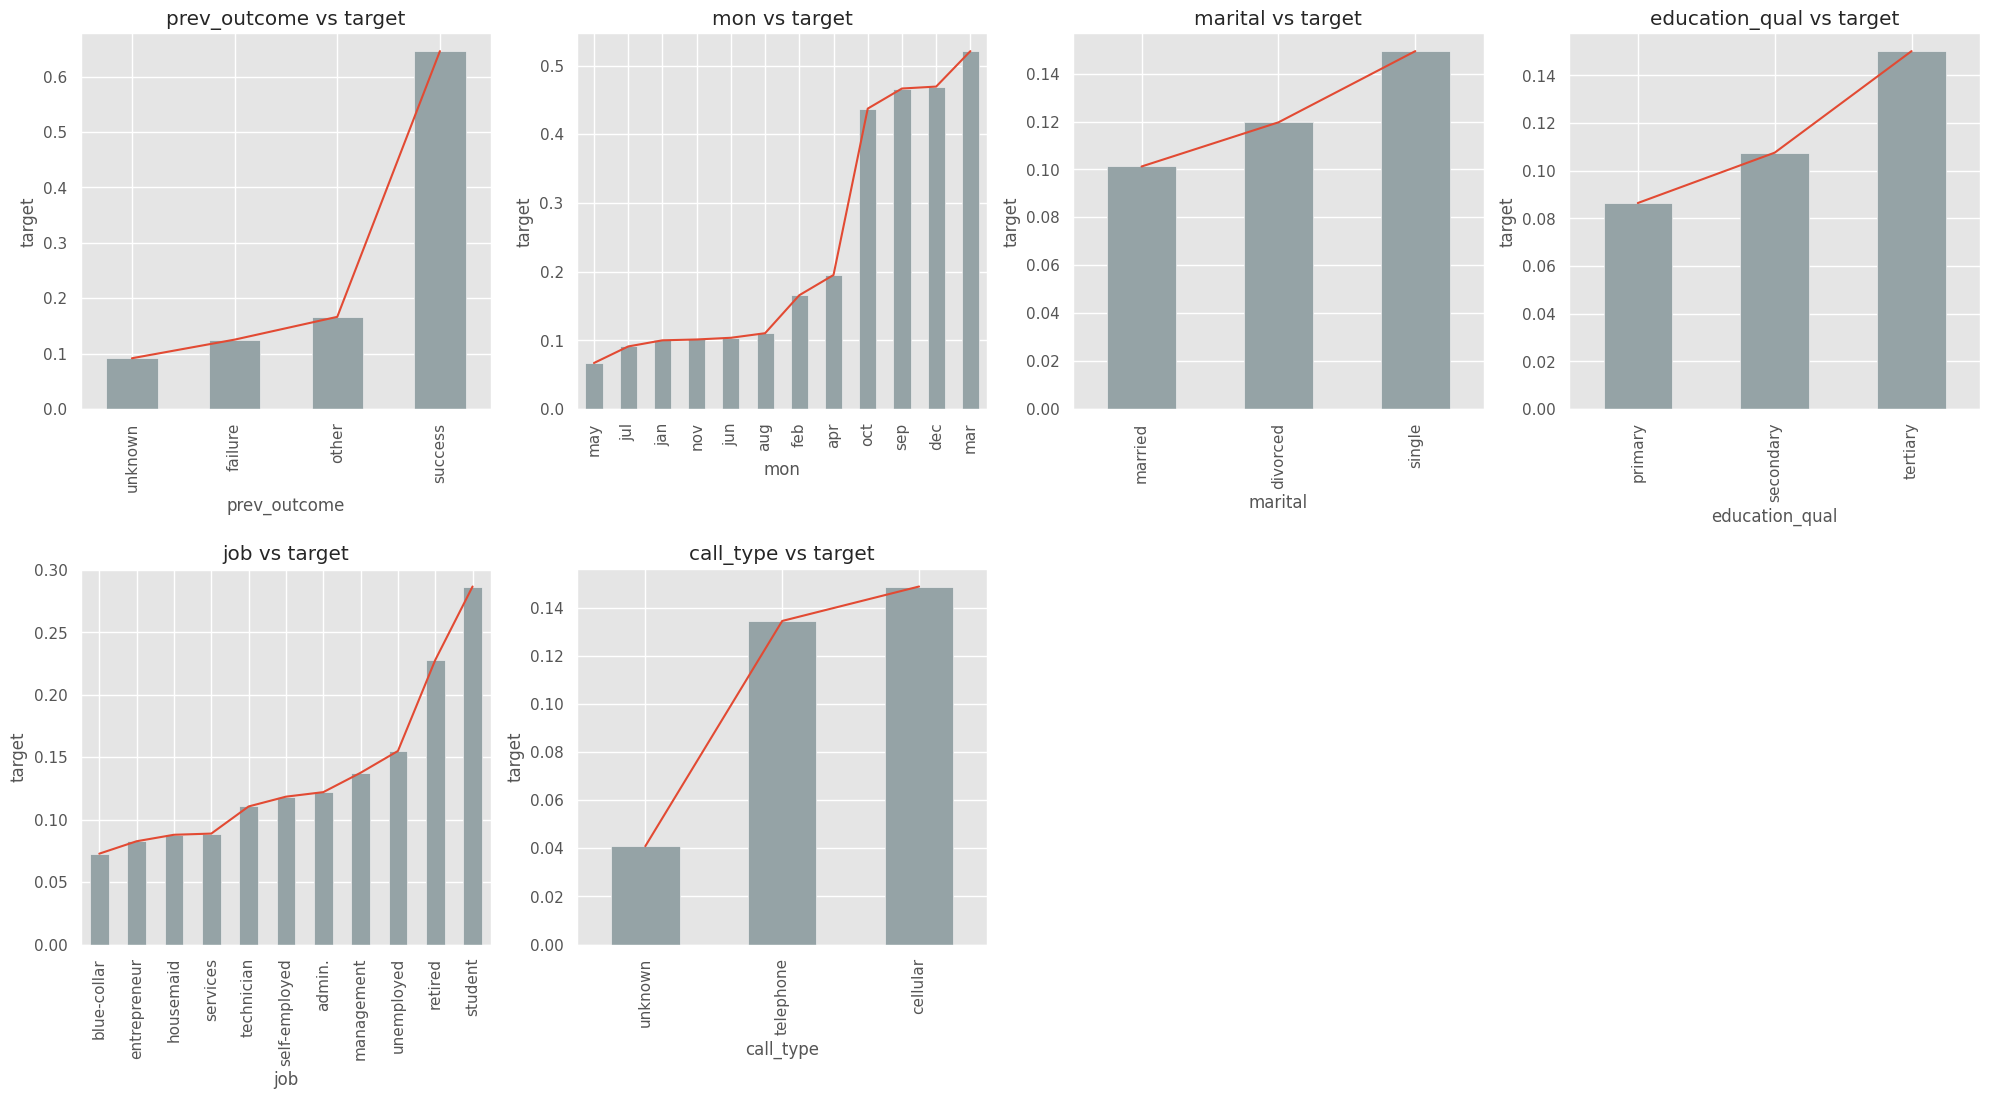

In [51]:

plt.style.use("ggplot")
plt.figure(figsize=(20,15))

i = 1
for col in cat_col:
  ax = plt.subplot(3,4,i)
  dff.groupby(col)['target'].mean().sort_values().plot(kind='bar', color = '#95a3a6')
  dff.groupby(col)['target'].mean().sort_values().plot(kind='line')
  plt.xlabel(col)
  plt.xticks(rotation = 90)
  plt.ylabel("target")
  plt.title(col+' vs target')
  i = i+1

plt.tight_layout()

## Feature vs Target - Continuous Feature

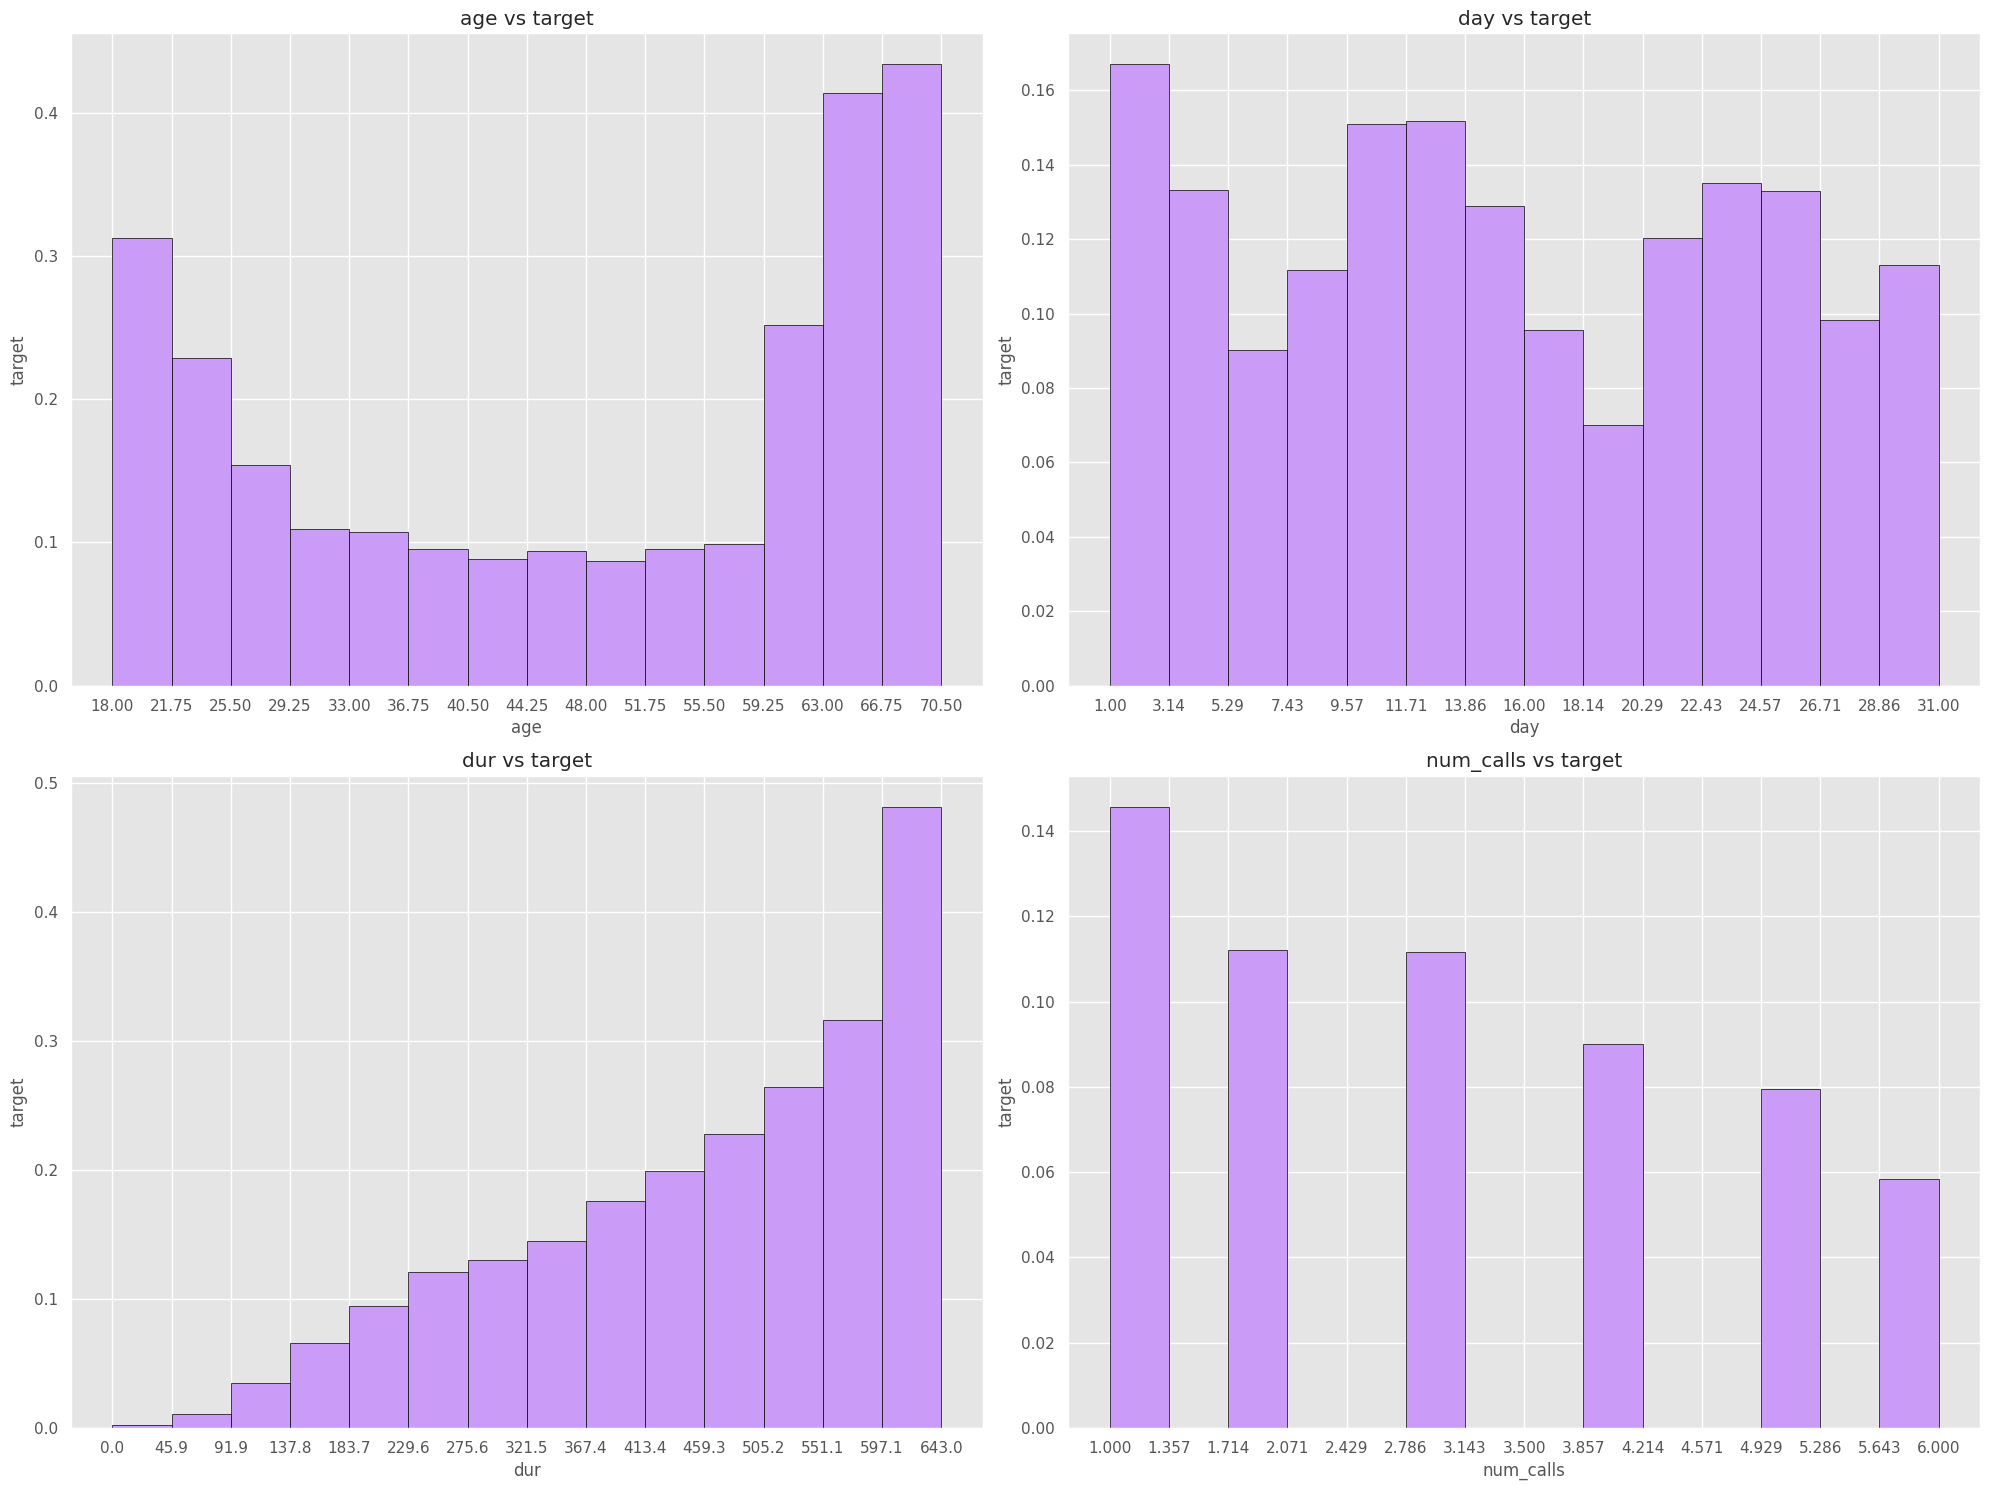

In [52]:

plt.style.use("ggplot")
plt.figure(figsize=(20,15))

i = 1
for col in num_col:
  plt.subplot(2,2,i)
  bins = np.linspace(min(dff[col]), max(dff[col]) + 1e-12, 15) # 10 bins, so 11 bin boundaries
  c = np.digitize(dff[col], bins)
  plt.bar(bins[:-1], [np.mean(dff.target[c == i]) for i in range(1, len(bins))],
          width=bins[1] - bins[0], align='edge', fc='#ca9bf7', ec='black')
  #plt.plot(bins[:-1], [np.mean(dff.target[c == i]) for i in range(1, len(bins))])
  plt.xticks(bins)
  #plt.margins(x=0.02) # smaller margins
  plt.xlabel(col)
  plt.ylabel("target")
  plt.title(col+' vs target')
  i = i+1


plt.tight_layout()




## Data convertion or Transformation

In [53]:

for col in cat_col:
  print(col , "--->", list(dff.groupby(col)['target'].mean().sort_values().to_dict().keys()))

prev_outcome ---> ['unknown', 'failure', 'other', 'success']
mon ---> ['may', 'jul', 'jan', 'nov', 'jun', 'aug', 'feb', 'apr', 'oct', 'sep', 'dec', 'mar']
marital ---> ['married', 'divorced', 'single']
education_qual ---> ['primary', 'secondary', 'tertiary']
job ---> ['blue-collar', 'entrepreneur', 'housemaid', 'services', 'technician', 'self-employed', 'admin.', 'management', 'unemployed', 'retired', 'student']
call_type ---> ['unknown', 'telephone', 'cellular']


In [54]:
dff['marital'] =dff['marital'].map({'married': 1, 'divorced': 2, 'single' : 3})
dff['education_qual'] =dff['education_qual'].map({'primary': 1, 'secondary': 2, 'tertiary' : 3})
dff['call_type'] =dff['call_type'].map({'unknown': 1, 'telephone': 5, 'cellular' : 6})
dff['prev_outcome'] =dff['prev_outcome'].map({'unknown': 1, 'failure': 2, 'other' : 3, 'success': 8})
dff['job'] =dff['job'].map({'blue-collar':1, 'entrepreneur':2, 'housemaid':3, 'services':4, 'technician':5, 'self-employed':6, 'admin.':7, 'management':8, 'unemployed':9, 'retired':11, 'student':13})
dff['mon'] =dff['mon'].map({'may':1, 'jul':2, 'jan':3, 'nov':4, 'jun':5, 'aug':6, 'feb':8, 'apr':10, 'oct':15, 'sep':16, 'dec':17, 'mar':19})

## Feature selection and Data Splitting



In [55]:
x = dff.drop(['target'],axis = 1)
y = dff['target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

In [56]:
def bias_verify(a):
  t = a.value_counts()
  print('Class 0:', t[0])
  print('Class 1:', t[1])
  print('Proportion of class 0 is ', round(t[0] * 100 / (t[1] + t[0]), 2),'%')

## Data Sampling

In [57]:
print(bias_verify(y))
print(bias_verify(y_train))

Class 0: 39662
Class 1: 5255
Proportion of class 0 is  88.3 %
None
Class 0: 31724
Class 1: 4209
Proportion of class 0 is  88.29 %
None


In [58]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

 Balencing data with SMOTE

In [59]:
smt = SMOTE(sampling_strategy = 'minority')
x_smt , y_smt = smt.fit_resample(x_train,y_train)
bias_verify(y_smt)

Class 0: 31724
Class 1: 31724
Proportion of class 0 is  50.0 %


Balencing data with SMOTE-EEN

In [60]:
smtenn = SMOTEENN(sampling_strategy = 'minority')
x_smtenn , y_smtenn = smtenn.fit_resample(x_train,y_train)
bias_verify(y_smtenn)

Class 0: 24766
Class 1: 30489
Proportion of class 0 is  44.82 %


Balencing data with SMOTE-Tomek

In [61]:
smtmk = SMOTETomek(sampling_strategy = 'minority')
x_smtmk , y_smtmk = smtmk.fit_resample(x_train,y_train)
bias_verify(y_smtmk)

Class 0: 31580
Class 1: 31580
Proportion of class 0 is  50.0 %


## Data Scaling

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_smt)
x_test_scaled = scaler.transform(x_test)

## Modeling

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [64]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_smt)
lr.score(x_test_scaled,y_test)

0.8143365983971504

In [65]:
# f1_score for test data
y_pred_lr = lr.predict(x_test_scaled)
f1_lr = f1_score(y_test,y_pred_lr)
print("test:",f1_lr)

test: 0.505338078291815


In [66]:
# f1_score for train data
y_pred_tr_lr = lr.predict(x_train_scaled)
f1_lr_tr = f1_score(y_smt,y_pred_tr_lr)
print("train:",f1_lr_tr)

train: 0.8179861427516535


In [67]:
print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      6658
           1       0.81      0.37      0.51      2326

    accuracy                           0.81      8984
   macro avg       0.81      0.67      0.70      8984
weighted avg       0.81      0.81      0.79      8984



### KNN Algorithm

In [68]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_smt)
  print("K value :", i, "Train Score : ", knn.score(x_test_scaled,y_test), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_test_scaled, y_test, scoring='f1', cv=10)))

K value : 1 Train Score :  0.8457257346393589 Cross Value Accuracy : 0.42034162321471513
K value : 2 Train Score :  0.8669857524487978 Cross Value Accuracy : 0.3004279540365079
K value : 3 Train Score :  0.8380454140694568 Cross Value Accuracy : 0.4183254144603086
K value : 4 Train Score :  0.8536286731967943 Cross Value Accuracy : 0.33473611447502727
K value : 5 Train Score :  0.8335930543187889 Cross Value Accuracy : 0.41658229193838725
K value : 6 Train Score :  0.8492876224398932 Cross Value Accuracy : 0.3556749947689006
K value : 7 Train Score :  0.8342609082813891 Cross Value Accuracy : 0.41200321788150535
K value : 8 Train Score :  0.8466162065894924 Cross Value Accuracy : 0.35629948272318945
K value : 9 Train Score :  0.835040071237756 Cross Value Accuracy : 0.39428140898087466
K value : 10 Train Score :  0.8478406055209261 Cross Value Accuracy : 0.37000844182030423
K value : 20 Train Score :  0.8399376669634907 Cross Value Accuracy : 0.3641450277744788
K value : 30 Train Score

In [69]:
knn = KNeighborsClassifier(3)
knn.fit(x_train_scaled, y_smt)
y_pred_knn = knn.predict(x_test_scaled)
y_pred_tr_knn = knn.predict(x_train_scaled)
f1_knn = f1_score(y_test,y_pred_knn)
f1_knn_tr = f1_score(y_smt, y_pred_tr_knn)
print("test:",f1_knn)
print("train:",f1_knn_tr)

test: 0.49391304347826076
train: 0.945251021777588


In [70]:
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7155
           1       0.68      0.39      0.49      1829

    accuracy                           0.84      8984
   macro avg       0.77      0.67      0.70      8984
weighted avg       0.82      0.84      0.82      8984



### XG Boost

XG Boost with SMOTE

In [71]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  xgb = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  xgb.fit(x_smt,y_smt) #train the model
  print("Learning rate : ", lr," Train score : ", xgb.score(x_test,y_test)," Cross-Val score : ", np.mean(cross_val_score(xgb, x_test, y_test,scoring='f1',cv=10)))

Learning rate :  0.01  Train score :  0.8233526268922529  Cross-Val score :  0.4590536221326767
Learning rate :  0.02  Train score :  0.8349287622439893  Cross-Val score :  0.46955462025403244
Learning rate :  0.03  Train score :  0.8396037399821905  Cross-Val score :  0.47537676490703584
Learning rate :  0.04  Train score :  0.8436108637577916  Cross-Val score :  0.4813775812242492
Learning rate :  0.05  Train score :  0.8549643811219947  Cross-Val score :  0.4926546732567794
Learning rate :  0.1  Train score :  0.8803428317008014  Cross-Val score :  0.5038632493434023
Learning rate :  0.11  Train score :  0.8854630454140695  Cross-Val score :  0.5019901437468197
Learning rate :  0.12  Train score :  0.8880231522707035  Cross-Val score :  0.4994043220902033
Learning rate :  0.13  Train score :  0.888579697239537  Cross-Val score :  0.4979200004188974
Learning rate :  0.14  Train score :  0.8904719501335708  Cross-Val score :  0.5052380023382309
Learning rate :  0.15  Train score :  0.

In [72]:
xgb = XGBClassifier(learning_rate = 0.2, n_estimators=100, verbosity = 0) # initialise the model
xgb.fit(x_smt,y_smt)
y_pred_xgb_smt = xgb.predict(x_test)
y_pred_tr_xgb_smt = xgb.predict(x_smt)
f1_xgb_smt = f1_score(y_test,y_pred_xgb_smt)
f1_xgb_smt_tr = f1_score(y_smt, y_pred_tr_xgb_smt)
print("test:",f1_xgb_smt)
print("train:",f1_xgb_smt_tr)

test: 0.5886990801576872
train: 0.9492372312352637


In [73]:
print(classification_report(y_pred_xgb_smt, y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7747
           1       0.64      0.54      0.59      1237

    accuracy                           0.90      8984
   macro avg       0.79      0.75      0.76      8984
weighted avg       0.89      0.90      0.89      8984



XG Boost with SMOTE-ENN

In [74]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  xgb = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  xgb.fit(x_smtenn,y_smtenn) #train the model
  print("Learning rate : ", lr," Train score : ", xgb.score(x_test,y_test)," Cross-Val score : ", np.mean(cross_val_score(xgb, x_test, y_test,scoring='f1',cv=10)))

Learning rate :  0.01  Train score :  0.77493321460374  Cross-Val score :  0.4590536221326767
Learning rate :  0.02  Train score :  0.7954140694568121  Cross-Val score :  0.46955462025403244
Learning rate :  0.03  Train score :  0.8008682101513802  Cross-Val score :  0.47537676490703584
Learning rate :  0.04  Train score :  0.807212822796082  Cross-Val score :  0.4813775812242492
Learning rate :  0.05  Train score :  0.816006233303651  Cross-Val score :  0.4926546732567794
Learning rate :  0.1  Train score :  0.8447239536954586  Cross-Val score :  0.5038632493434023
Learning rate :  0.11  Train score :  0.8496215494211933  Cross-Val score :  0.5019901437468197
Learning rate :  0.12  Train score :  0.8497328584149599  Cross-Val score :  0.4994043220902033
Learning rate :  0.13  Train score :  0.8548530721282279  Cross-Val score :  0.4979200004188974
Learning rate :  0.14  Train score :  0.8566340160284951  Cross-Val score :  0.5052380023382309
Learning rate :  0.15  Train score :  0.858

In [75]:
xgb = XGBClassifier(learning_rate = 0.2, n_estimators=100, verbosity = 0) # initialise the model
xgb.fit(x_smtenn,y_smtenn)
y_pred_xgb_smtenn = xgb.predict(x_test)
y_pred_tr_xgb_smtenn = xgb.predict(x_smtenn)
f1_xgb_smtenn = f1_score(y_test,y_pred_xgb_smtenn)
f1_xgb_smtenn_tr = f1_score(y_smtenn, y_pred_tr_xgb_smtenn)
print("test:",f1_xgb_smtenn)
print("train:",f1_xgb_smtenn_tr)

test: 0.5860178204249485
train: 0.981854541282148


In [76]:
print(classification_report(y_pred_xgb_smtenn, y_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      7112
           1       0.82      0.46      0.59      1872

    accuracy                           0.87      8984
   macro avg       0.84      0.71      0.75      8984
weighted avg       0.86      0.87      0.85      8984



XG Boost with SMOTE-Tomek

In [77]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  xgb = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  xgb.fit(x_smtmk,y_smtmk) #train the model
  print("Learning rate : ", lr," Train score : ", xgb.score(x_test,y_test)," Cross-Val score : ", np.mean(cross_val_score(xgb, x_test, y_test,scoring='f1',cv=10)))

Learning rate :  0.01  Train score :  0.8233526268922529  Cross-Val score :  0.4590536221326767
Learning rate :  0.02  Train score :  0.832146037399822  Cross-Val score :  0.46955462025403244
Learning rate :  0.03  Train score :  0.8379341050756901  Cross-Val score :  0.47537676490703584
Learning rate :  0.04  Train score :  0.8477292965271594  Cross-Val score :  0.4813775812242492
Learning rate :  0.05  Train score :  0.8565227070347284  Cross-Val score :  0.4926546732567794
Learning rate :  0.1  Train score :  0.8830142475512022  Cross-Val score :  0.5038632493434023
Learning rate :  0.11  Train score :  0.8847951914514692  Cross-Val score :  0.5019901437468197
Learning rate :  0.12  Train score :  0.8878005342831701  Cross-Val score :  0.4994043220902033
Learning rate :  0.13  Train score :  0.8886910062333037  Cross-Val score :  0.4979200004188974
Learning rate :  0.14  Train score :  0.8889136242208371  Cross-Val score :  0.5052380023382309
Learning rate :  0.15  Train score :  0.

In [78]:
xgb = XGBClassifier(learning_rate = 0.2, n_estimators=100, verbosity = 0) # initialise the model
xgb.fit(x_smtmk,y_smtmk)
y_pred_xgb_smtmk = xgb.predict(x_test)
y_pred_tr_xgb_smtmk = xgb.predict(x_smtmk)
f1_xgb_smtmk = f1_score(y_test,y_pred_xgb_smtmk)
f1_xgb_smtmk_tr = f1_score(y_smtmk, y_pred_tr_xgb_smtmk)
print("test:",f1_xgb_smtmk)
print("train:",f1_xgb_smtmk_tr)

test: 0.5898334794040315
train: 0.9502462590582551


In [79]:
print(classification_report(y_pred_xgb_smtmk, y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7748
           1       0.64      0.54      0.59      1236

    accuracy                           0.90      8984
   macro avg       0.79      0.75      0.77      8984
weighted avg       0.89      0.90      0.89      8984



### Decision Tree

In [80]:
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30,40]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(x_smt, y_smt)
    print("Max_Depth ", depth," Train score : ", dt.score(x_test,y_test)," Cross-Val score : ", np.mean(cross_val_score(dt, x_test, y_test,scoring='f1',cv=10)))

Max_Depth  1  Train score :  0.6460373998219056  Cross-Val score :  0.0
Max_Depth  2  Train score :  0.5869323241317899  Cross-Val score :  0.2471858313894013
Max_Depth  3  Train score :  0.6941228851291185  Cross-Val score :  0.38411329483100454
Max_Depth  4  Train score :  0.7355298308103295  Cross-Val score :  0.4769020123300062
Max_Depth  5  Train score :  0.7384238646482636  Cross-Val score :  0.44311833809482604
Max_Depth  6  Train score :  0.7461041852181657  Cross-Val score :  0.45981204382095775
Max_Depth  7  Train score :  0.8370436331255565  Cross-Val score :  0.4688984169390015
Max_Depth  8  Train score :  0.8142252894033838  Cross-Val score :  0.48328952940973213
Max_Depth  9  Train score :  0.8172306322350846  Cross-Val score :  0.4585477223503479
Max_Depth  10  Train score :  0.8431656277827249  Cross-Val score :  0.4587496059084901
Max_Depth  11  Train score :  0.8453918076580588  Cross-Val score :  0.4503905773918411
Max_Depth  12  Train score :  0.8479519145146928  Cr

In [81]:
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(x_smt, y_smt)
y_pred_dt_smt = dt.predict(x_test)
y_pred_tr_dt_smt = dt.predict(x_smt)
f1_dt_smt = f1_score(y_test,y_pred_dt_smt)
f1_dt_smt_tr = f1_score(y_smt, y_pred_tr_dt_smt)
print("test:",f1_dt_smt)
print("train:",f1_dt_smt_tr)

test: 0.5053317535545024
train: 0.8578922488067463


In [82]:
print(classification_report(y_pred_dt_smt, y_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      6654
           1       0.82      0.37      0.51      2330

    accuracy                           0.81      8984
   macro avg       0.81      0.67      0.70      8984
weighted avg       0.81      0.81      0.79      8984



### Random Forest

In [83]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,25,30,35,40,45,50]:
  rf= RandomForestClassifier(max_depth=depth,n_estimators=100)#,max_features="sqrt")   # will tell the DT to not grow past the given threhsold
  rf.fit(x_train, y_train) # the model is trained
  print("Max_Depth ", depth," Train score : ", rf.score(x_test,y_test)," Cross-Val score : ", np.mean(cross_val_score(rf, x_test, y_test,scoring='f1',cv=10)))

Max_Depth  1  Train score :  0.8835707925200356  Cross-Val score :  0.0
Max_Depth  2  Train score :  0.8864648263579697  Cross-Val score :  0.03359652245474043
Max_Depth  3  Train score :  0.8889136242208371  Cross-Val score :  0.19253369479730184
Max_Depth  4  Train score :  0.8921415850400712  Cross-Val score :  0.2839663068177921
Max_Depth  5  Train score :  0.8964826357969724  Cross-Val score :  0.3160664280724511
Max_Depth  6  Train score :  0.9009349955476402  Cross-Val score :  0.370395308993332
Max_Depth  7  Train score :  0.9041629563668745  Cross-Val score :  0.40615535278903925
Max_Depth  8  Train score :  0.907279608192342  Cross-Val score :  0.4250517978617225
Max_Depth  9  Train score :  0.9081700801424755  Cross-Val score :  0.45363512313078
Max_Depth  10  Train score :  0.9056099732858415  Cross-Val score :  0.4533439197120345
Max_Depth  20  Train score :  0.9059439002671416  Cross-Val score :  0.48050534735889333
Max_Depth  25  Train score :  0.9067230632235085  Cross-

In [84]:
rf = RandomForestClassifier(max_depth=25)
rf.fit(x_smt, y_smt)
y_pred_rf_smt = rf.predict(x_test)
y_pred_tr_rf_smt = rf.predict(x_smt)
f1_rf_smt = f1_score(y_test,y_pred_rf_smt)
f1_rf_smt_tr = f1_score(y_smt, y_pred_tr_rf_smt)
print("test:",f1_rf_smt)
print("train:",f1_rf_smt_tr)

test: 0.5838815789473686
train: 0.9991023480684734


In [85]:
print(classification_report(y_pred_rf_smt, y_test))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7598
           1       0.68      0.51      0.58      1386

    accuracy                           0.89      8984
   macro avg       0.80      0.73      0.76      8984
weighted avg       0.88      0.89      0.88      8984



In [86]:
print(" Linear Regression",f1_lr,'\n',"KNN",f1_knn,'\n',"XGBoost",f1_xgb_smt,'\n',"Decission Tree",f1_dt_smt,'\n',"Random Forest",f1_rf_smt)

 Linear Regression 0.505338078291815 
 KNN 0.49391304347826076 
 XGBoost 0.5886990801576872 
 Decission Tree 0.5053317535545024 
 Random Forest 0.5838815789473686


## Here XGBoost have the highest f1_score, Hence XGBoost is the best model when f1_score is considered

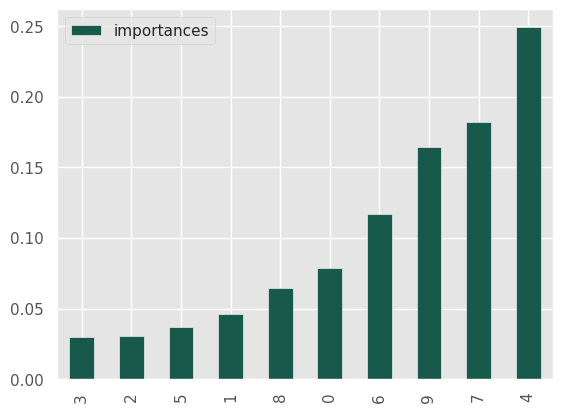

In [87]:
importances = xgb.feature_importances_
df1 = pd.DataFrame({"Features":pd.DataFrame(x_test).columns,"importances":importances})
df1.set_index("importances")

df1 = df1.sort_values('importances')
plt1 = df1.plot.bar(color='#17594A')

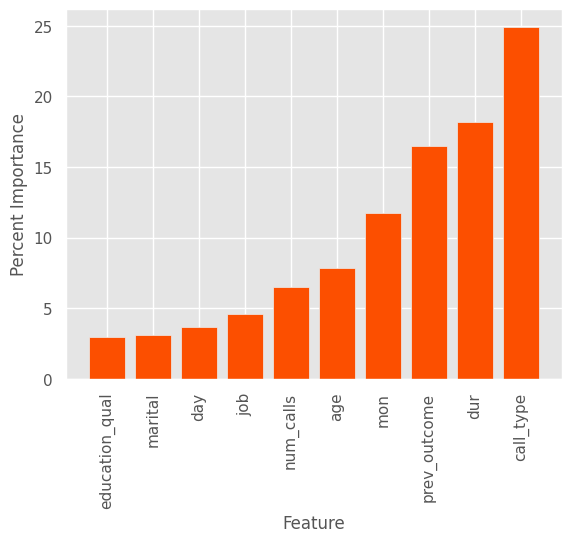

In [88]:
feature_names = list(x)
total_importance = importances.sum()
percent_importances = importances / total_importance * 100

# Create a DataFrame with the feature names and their percent importances
df2 = pd.DataFrame({'feature_names': feature_names, 'percent_importances': percent_importances})

# Sort the DataFrame by percent importances in descending order
ddf = df2.sort_values(by='percent_importances')

# Create a bar plot of the percent importances
plt.bar(x=ddf['feature_names'], height=ddf['percent_importances'], color='#FC4F00')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percent Importance')
plt.show()

## According to the Graphs, we can clearly see that, in XGBoost, when f1_score is considered, call_type plays a major role in Customer conversion